# Using `matplotlib`'s color maps
Colour is an important part of any figure and `matplotlib`'s `cmap`s handle that automatically. In theory at least, but everytime I need them end up trawling through stack overflow trying to get it work.

As a gift for future me, here are simple demos of common uses.

# Set up
Using the iris dataset from seaborn for demo.
Convert `species` into a pandas `category`, this makes it
easier to convert it into a numeric code to pass to colour maps.

In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib import cm

In [2]:

iris = sns.load_dataset('iris')
iris.species = pd.Categorical(iris.species)

iris_mean = iris.groupby("species")['sepal_width'].mean()

# `cmap`
Most `matplotlib` plot types take a `cmap` argument which makes mapping
numeric values to colour easy. Named colour maps are easy to access 
once you've imported `matplotlib.cm`, e.g. `cm.coolwarm`.

### Scatter map colour to value

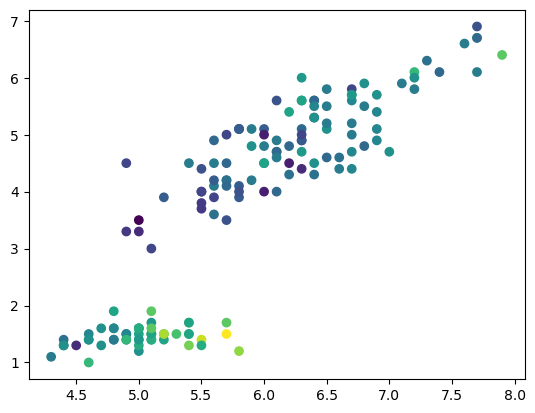

In [3]:
plt.scatter(
    x= iris.sepal_length,
    y= iris.petal_length,
    c= iris.sepal_width,
    cmap= cm.viridis
)
plt.show()


### scatter map colour to category
If using a categorical colour map

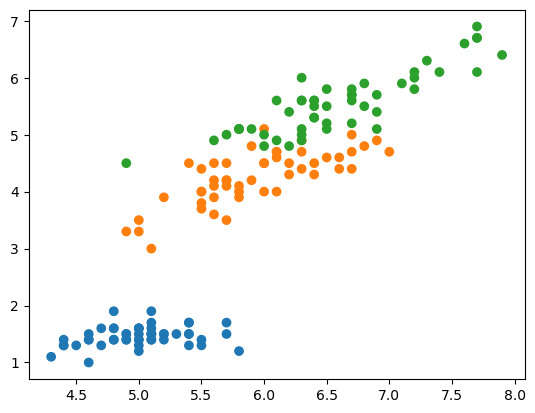

In [4]:
plt.scatter(iris.sepal_length, iris.petal_length, c=cm.tab10(iris.species.cat.codes))
plt.show()

If you use the `cmap` argument it will treat the colour scheme as continuous and select evenly spaced colours.

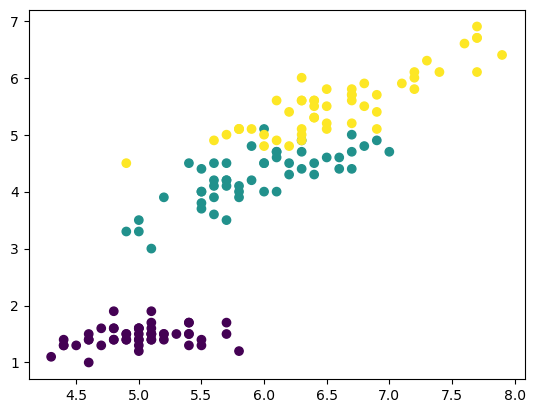

In [5]:

plt.scatter(iris.sepal_length, iris.petal_length, c=iris.species.cat.codes, cmap=cm.viridis)
plt.show()


## No cmap argument
Not all `matplotlib` plot types have a cmap argument. In these cases you have to call the `colormap` on the data to generate the colours and pass that to the `color` argument. For continuous values you will have to normalise the data.

### Bar plot, map colour to value

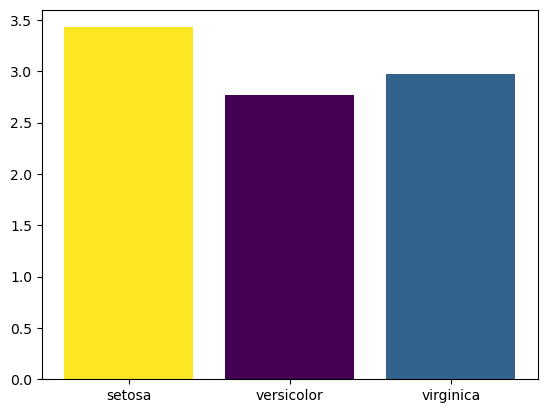

In [6]:
norm = Normalize()
plt.bar(iris_mean.index, iris_mean, color=cm.viridis(norm(iris_mean)))
plt.show()

### Bar plot, map colour to category

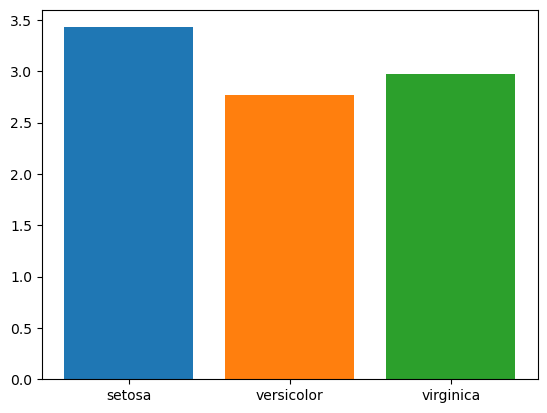

In [7]:
plt.bar(iris_mean.index, iris_mean, color=cm.tab10(iris_mean.index.codes))
plt.show()